* ライブラリ比較関数というスペクトルデータを解析する関数になります。
    - 鉱物スペクトルデータを収集したライブラリファイルと調査したい対象スペクトルデータ１つを比較します。
    - ライブラリファイルには、約6000のスペクトルデータがあります。
    - それぞれ比較し、類似度を算出することで、類似する鉱物を同定します。
* 「いじってみて」と記述されている直下のセルをいじってみてください。
* 実行は、Shift＋Enter です。
* いじってみた後に以下の項目それぞれの感想（評価）をください。なんでも大丈夫です。お願いします。
    - 良いところ
    - 悪いところ（良くないところ）
    - もう少しなところ（あれば良いと思うところ）
    - 他のアイデア（あればでいいです）

## ライブラリ比較関数

In [1]:
import pandas as pd
import importlib
import libcomp as lc
importlib.reload(lc)

# ライブラリファイル指定
library_file = 'RelabDatabase2022Dec31_mini/Library_Mineral_BD-VNIR.csv'
# カタログファイル指定
sample_catalogue_file = 'RelabDatabase2022Dec31_mini/catalogues/Sample_Catalogue.xlsx'
# 対象スペクトルファイル指定
target_spectrum_file = './data/frt00003621_07_if166l_E_-97.57339 N_24.96872.csv'

* いじってみて↓

In [2]:
''' 類似度算出に使用する各タイプ指定
        以下のいずれかのタイプを選択する。
            interp_type :   liner, sp
            scaling_type:   norm, st
            pcc         :   pcc, cos, edis     
        各タイプの説明
            interp_type     >> liner(線形補間), sp(スプライン補間)
            scaling_type    >> norm(正規化), st(標準化)
            pcc             >> pcc(ピアソンの相関係数), cos(コサイン類似度), edis(ユークリッド距離)
'''
interp_type, scaling_type, sim_type = 'liner', 'norm', 'pcc'

In [3]:
comparer = lc.LibraryComparison(library_file, sample_catalogue_file, target_spectrum_file)  # インスタンス作成

100% 6359/6359 [00:00<00:00, 7048.26 count/s]


>>> Library loading completed.



### 類似度判定ステップ
* いじってみて↓

In [4]:
''' 対象とする波長範囲（index）を指定
        comparer.slice_wav(100, 200)    >> 波長の100〜200を使用する
        comparer.slice_wav(100)         >> 波長の100〜を使用する
'''
comparer.slice_wav(50, 350)  # 対象とする波長範囲（index）

In [5]:
comparer.interpolate(interp_type)
comparer.scaling(scaling_type)
comparer.measure_similarity(sim_type)
comparer.result()

# result.to_excel('libcomp_result.xlsx', index=False)  # excelファイル作成

100% 6359/6359 [00:00<00:00, 8648.07 count/s]


>>> Interpolation completed.



100% 6359/6359 [00:00<00:00, 8693.67 count/s]


>>> Scaling completed.



100% 6359/6359 [00:00<00:00, 11215.08 count/s]

>>> Similarity measurement completed.



,SpectrumID,SampleID,pcc,Band,Min Wavelength,Max Wavelength,SubType
0,target,target,1.000000,300,1.32921,3.35724,target
1,c1aa01,AA-A1S-001,0.056050,187,1.32921,2.55000,Mica Annite Fayalite Quartz
2,c1aa02,AA-A1S-002,0.468142,187,1.32921,2.55000,Mica Annite Fayalite Quartz Spinel
3,c1aa03,AA-A1S-003,0.161179,187,1.32921,2.55000,Mica Annite Fayalite
4,c1aa04,AA-A1S-004,0.088726,187,1.32921,2.55000,Mica Ni-Annite Ni Metal Topaz Ammonium Aluminu...
...,...,...,...,...,...,...,...
6355,c1ze31,ZE-EAC-031,0.030564,255,1.32921,2.60000,Zeolite Heulandite
6356,c1ze32,ZE-EAC-032,0.024272,255,1.32921,2.60000,Zeolite Heulandite
6357,c1ze57,ZE-EAC-057,-0.225461,255,1.32921,2.60000,Zeolite Analcime
6358,cazi01,ZI-EAC-001,-0.030264,255,1.32921,2.60000,Zircon


### プロットステップ

In [6]:
comparer.find_common_valley_indices()  # 共通の谷点のインデックスを取得
df = comparer.result()
target_df = df.query("index == 0")
library_df = df.query("index != 0")
library_df2 = library_df.copy()

100% 6359/6359 [00:00<00:00, 8037.97 count/s]

>>> Filtering(common valleys) completed.



* いじってみて↓

In [7]:
''' フィルター
        以下、フィルターをかけたいコードを実行する。（好きなように）
'''
library_df2 = library_df2[library_df2['Band'] > 50]  # 一致バンド数が５０以上

''' ソート
        以下のいずれかを実行する。（実行行だけコメント解除する）
            類似度、一致バンド数
        引数説明
            by          >> データフレームの列名
            ascending   >> True(降順), False(昇順)
'''
library_df2 = library_df2.sort_values(by=sim_type, ascending=False)  # 類似度
# library_df2 = library_df2.sort_values(by="Band", ascending=False)  # 一致バンド数

In [8]:
library_df2 = pd.concat([target_df, library_df2])  # 対象スペクトルとライブラリスペクトルのデータフレーム結合

#### プロット
* いじってみて↓

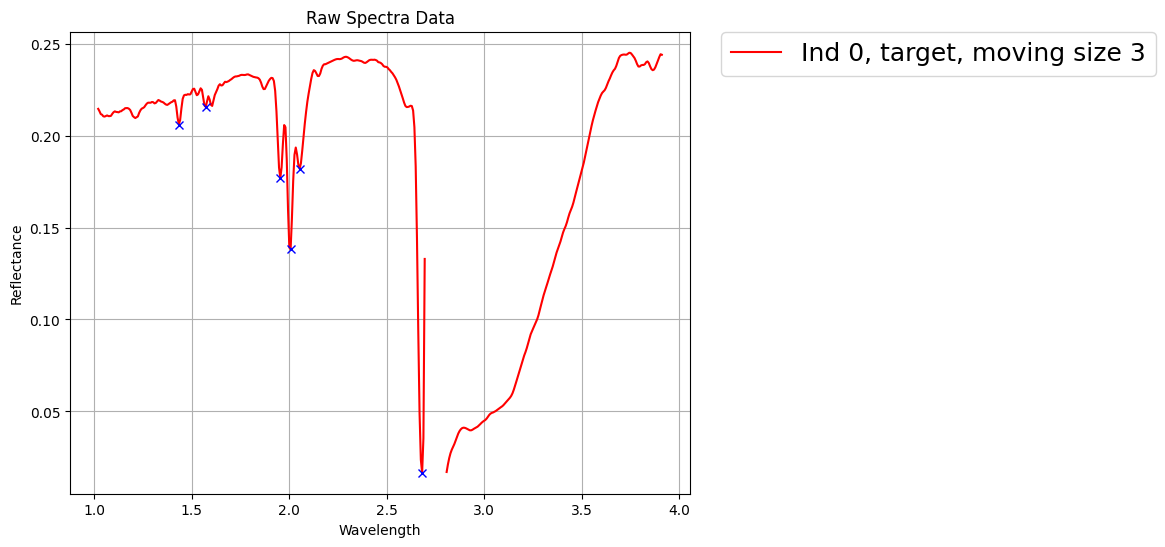

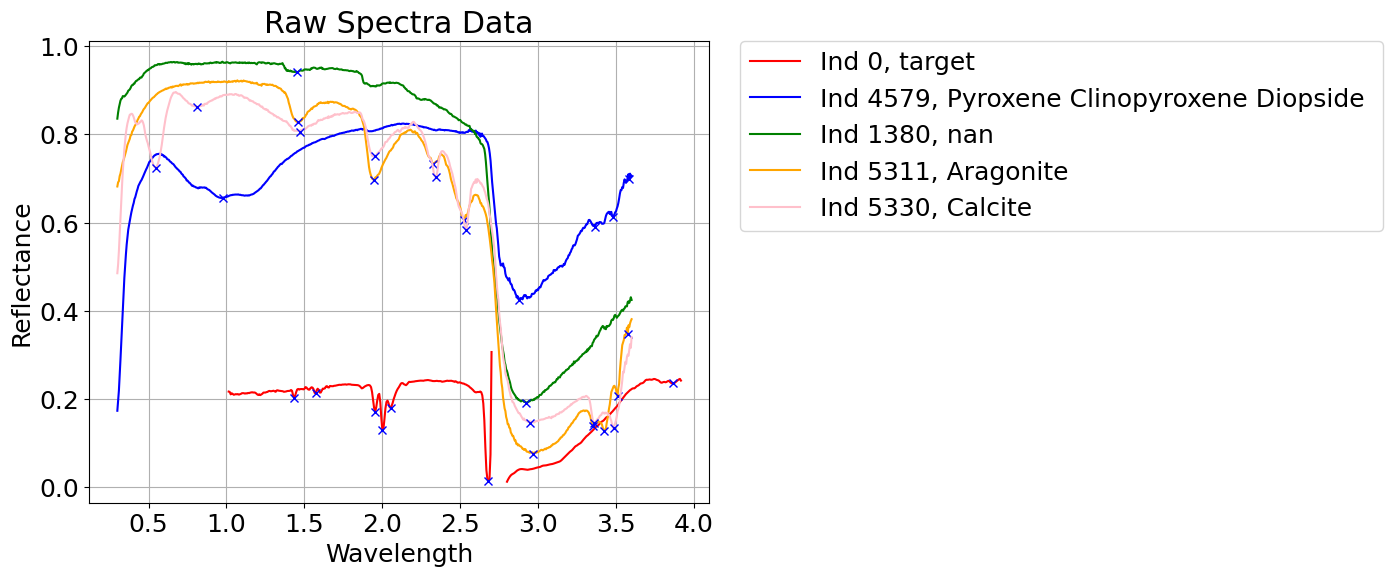

In [9]:
''' 指定したインデックスをプロット
        index_list: 指定したインデックスのスペクトルがプロットされる
'''
index_list = [0]

''' 指定されたインデックスをプロット
        引数説明
            avg_size    : 移動平均を取る値
            find        : valley(谷点を表示), None(谷点を表示しない)
            prominence  : 谷点の判断基準の値

'''
comparer.plot(library_df2, index_list, 'raw', avg_size=3, find='valley', prominence=0.01)

''' 指定した上位の数分プロット
        以下のいずれかを実行する。（実行行だけコメント解除する）
            nlargest, nsmallest
        各関数の説明
            nlargest    >> 大きい方から
            nsmallest   >> 小さい方から
'''
index_list = library_df2.nlargest(5, sim_type).index
# index_list = library_df2.nsmallest(10, sim_type).index

comparer.plot(library_df2, index_list, 'raw', find='valley', prominence=0.01)